<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span><ul class="toc-item"><li><span><a href="#Load-packages-and-related-objects" data-toc-modified-id="Load-packages-and-related-objects-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Load packages and related objects</a></span></li></ul></li><li><span><a href="#Data-preparation" data-toc-modified-id="Data-preparation-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data preparation</a></span><ul class="toc-item"><li><span><a href="#Load-data" data-toc-modified-id="Load-data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Load data</a></span></li><li><span><a href="#Feature-encoding" data-toc-modified-id="Feature-encoding-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Feature encoding</a></span></li><li><span><a href="#Split-dataset-$\mapsto$-train/test" data-toc-modified-id="Split-dataset-$\mapsto$-train/test-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Split dataset $\mapsto$ train/test</a></span></li></ul></li><li><span><a href="#Inspection-of-the-training-set" data-toc-modified-id="Inspection-of-the-training-set-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Inspection of the training set</a></span><ul class="toc-item"><li><span><a href="#Short-summary-of-training-set" data-toc-modified-id="Short-summary-of-training-set-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Short summary of training set</a></span></li><li><span><a href="#Visualization" data-toc-modified-id="Visualization-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Visualization</a></span></li></ul></li><li><span><a href="#Classification-with-KNN" data-toc-modified-id="Classification-with-KNN-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Classification with KNN</a></span><ul class="toc-item"><li><span><a href="#Classification-using-all-the-features" data-toc-modified-id="Classification-using-all-the-features-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Classification using all the features</a></span><ul class="toc-item"><li><span><a href="#Classification-errors" data-toc-modified-id="Classification-errors-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Classification errors</a></span></li><li><span><a href="#Confusion-matrix" data-toc-modified-id="Confusion-matrix-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>Confusion matrix</a></span></li></ul></li><li><span><a href="#Classification-using-only-2-features" data-toc-modified-id="Classification-using-only-2-features-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Classification using only 2 features</a></span><ul class="toc-item"><li><span><a href="#Decision-boundary" data-toc-modified-id="Decision-boundary-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Decision boundary</a></span></li><li><span><a href="#Tune-the-$k$-parameter" data-toc-modified-id="Tune-the-$k$-parameter-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>Tune the $k$ parameter</a></span><ul class="toc-item"><li><span><a href="#Manually" data-toc-modified-id="Manually-4.2.2.1"><span class="toc-item-num">4.2.2.1&nbsp;&nbsp;</span>Manually</a></span></li><li><span><a href="#Bonus:-with-sklearn-GridSearchCV" data-toc-modified-id="Bonus:-with-sklearn-GridSearchCV-4.2.2.2"><span class="toc-item-num">4.2.2.2&nbsp;&nbsp;</span>Bonus: with <code>sklearn</code> <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html" target="_blank"><code>GridSearchCV</code></a></a></span></li></ul></li></ul></li></ul></li></ul></div>

# Introduction

This goal of this first TP is twofold:

- familiarize yourself with Python `pandas, seaborn, sklearn`
- practice the data analysis workflow
    - with the $k$-NN classifier on a toy example: the [`iris` flower dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set)
    - display a descision boundary
    - apply a simple receipe to tune the $k$ parameter


**You are expected to answer, comment and argument everything you do**

## Load packages and related objects

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# use pandas to play with dataset
import pandas as pd

# use seaborn to display data
import seaborn as sns

# sklearn is THE Machine Learning library
from sklearn.datasets import load_iris ### some training datasets are available in the library
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Algorithm of the day
from sklearn.neighbors import KNeighborsClassifier as KNN

# Data preparation

In this first phase you get a first contact with the data

- size
- name of features (potentially rename some of them)
- missing values (there are no missing values with `iris`)
- type of features
- number of classes

and then split it into train/test sets

## Load data

In [3]:
iris = load_iris() # load iris dataset from scikit-learn

What are the attributes of the `iris` object?

In [4]:
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

print("Attributs du jeu de données Iris :")
print(df.columns)

Attributs du jeu de données Iris :
Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')


What are the Target name of the iris Object ?

In [ ]:
#species

Create `DataFrame`s:

- `X_data` from `iris.data`
- `y_data` from `iris.target`
    * 2 columns `'label'` (0,1,2) and `'specie'` ('setosa', 'versicolor', 'virginica'')
    * set the type of the `'specie'` column to '`category`'

In [5]:
X_data = pd.DataFrame(iris.data, columns=iris.feature_names)
y_data = pd.DataFrame(iris.target, columns=['label'])


What is the size of the dataset?

Hint: use `.shape`

In [6]:
print("Taille du dataset Iris :",df.shape)

Taille du dataset Iris : (150, 4)


Display the first 10 rows of the dataset

Hint: use `.head()`

In [7]:
print(df.head(10))

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
5                5.4               3.9                1.7               0.4
6                4.6               3.4                1.4               0.3
7                5.0               3.4                1.5               0.2
8                4.4               2.9                1.4               0.2
9                4.9               3.1                1.5               0.1


What is the type of each feature and what do they correspond to?

In [ ]:
#Decimal

What is the proportion of each class?

In [11]:
# Compter le nombre d'instances de chaque classe
class_counts = df.value_counts()

# Calcul de la proportion de chaque classe
class_proportions = class_counts / df.shape[0]

print(class_proportions)

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
5.8                2.7               5.1                1.9                 0.013333
6.2                2.2               4.5                1.5                 0.006667
                   2.9               4.3                1.3                 0.006667
                   3.4               5.4                2.3                 0.006667
6.3                2.3               4.4                1.3                 0.006667
                                                                              ...   
5.4                3.9               1.3                0.4                 0.006667
                                     1.7                0.4                 0.006667
5.5                2.3               4.0                1.3                 0.006667
                   2.4               3.7                1.0                 0.006667
7.9                3.8               6.4                2.0                 0

## Feature encoding

Try to rename features' name: remove `  (cm)` for simpler calls/display

In [12]:

iris_data = df.rename(columns=lambda x: x.replace('(cm)', '').strip())

print(iris_data.columns)

Index(['sepal length', 'sepal width', 'petal length', 'petal width'], dtype='object')


## Split dataset $\mapsto$ train/test

Hint:
- use `train_test_split`
- think about `shuffle` and `stratified` arguments!

After the split the test set is **only** used to assess the performance of your classifier on unseen data.

In [18]:
test_frac = 1/3 # Fraction of the data set to consider as test set

X_train, X_test,\
y_train, y_test = train_test_split(X_data, y_data.label,
                                   test_size=test_frac,
                                   shuffle=True,
                                   stratify=y_data.label)#,
#                                    random_state=123)

Comment on the impact of the `shuffle` and `stratified` arguments on the proportion of classes

Shuffle the data + respect the proportion of values in each class.

What could the `random_state` argument be used for? 

Reproducibility of experiments.

___


Create a `DataFrame` named `data_train` as the concatenation of `X_train` and the corresponding labels.




That will be convenient to use in the visualization part

In [19]:
data_train = pd.concat([X_train, y_train], axis=1)

# Inspection of the training set

This is the most important part!

You must carefully study the distribution of your data.

For this purpose you are free to compute and display as many stastistical properties of the data and make some relevant comments.

## Short summary of training set

Hint: you can use the `describe` method

In [20]:
summary_statistics = data_train.describe()

print(summary_statistics)

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         100.000000        100.000000         100.000000   
mean            5.824000          3.071000           3.745000   
std             0.831224          0.435842           1.764886   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.500000   
50%             5.700000          3.000000           4.250000   
75%             6.400000          3.400000           5.100000   
max             7.900000          4.400000           6.700000   

       petal width (cm)       label  
count        100.000000  100.000000  
mean           1.205000    1.000000  
std            0.765595    0.816497  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.825000    2.000000  
max            2.500000    2.000000  


Compute the correlation matrix

In [21]:
correlation_matrix = data_train.corr()

print(correlation_matrix)

                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.000290           0.865786   
sepal width (cm)           -0.000290          1.000000          -0.345618   
petal length (cm)           0.865786         -0.345618           1.000000   
petal width (cm)            0.813438         -0.279876           0.966059   
label                       0.772431         -0.354806           0.953307   

                   petal width (cm)     label  
sepal length (cm)          0.813438  0.772431  
sepal width (cm)          -0.279876 -0.354806  
petal length (cm)          0.966059  0.953307  
petal width (cm)           1.000000  0.963069  
label                      0.963069  1.000000  


## Visualization

Enjoy [`seaborn`](https://seaborn.pydata.org/index.html) displays

- `boxplot`
- `violinplot`
- `pairplot`
- `pie`

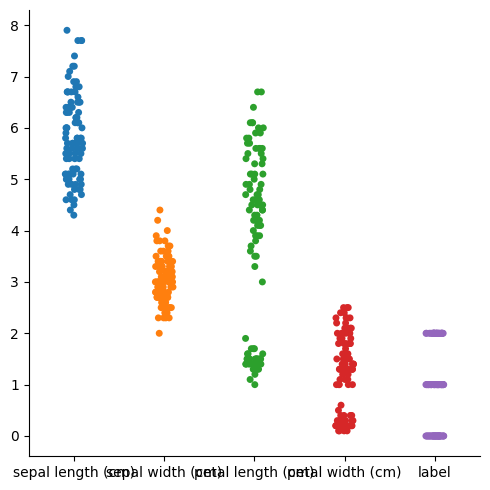

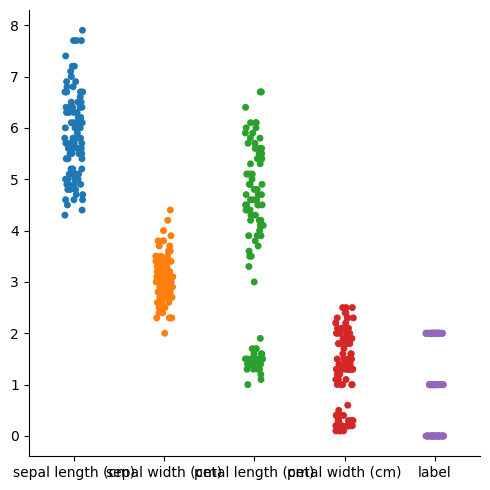

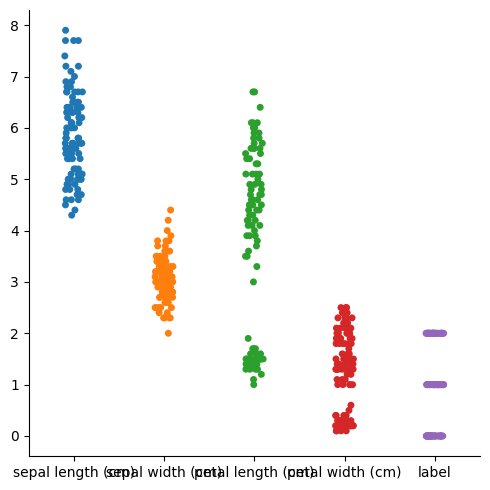

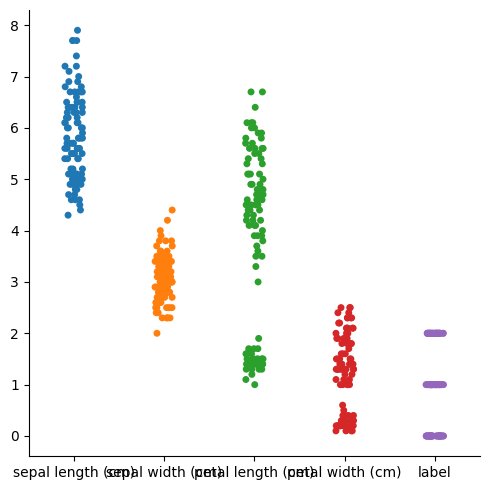

In [25]:
for feature in X_train.columns:
    sns.catplot(data_train)

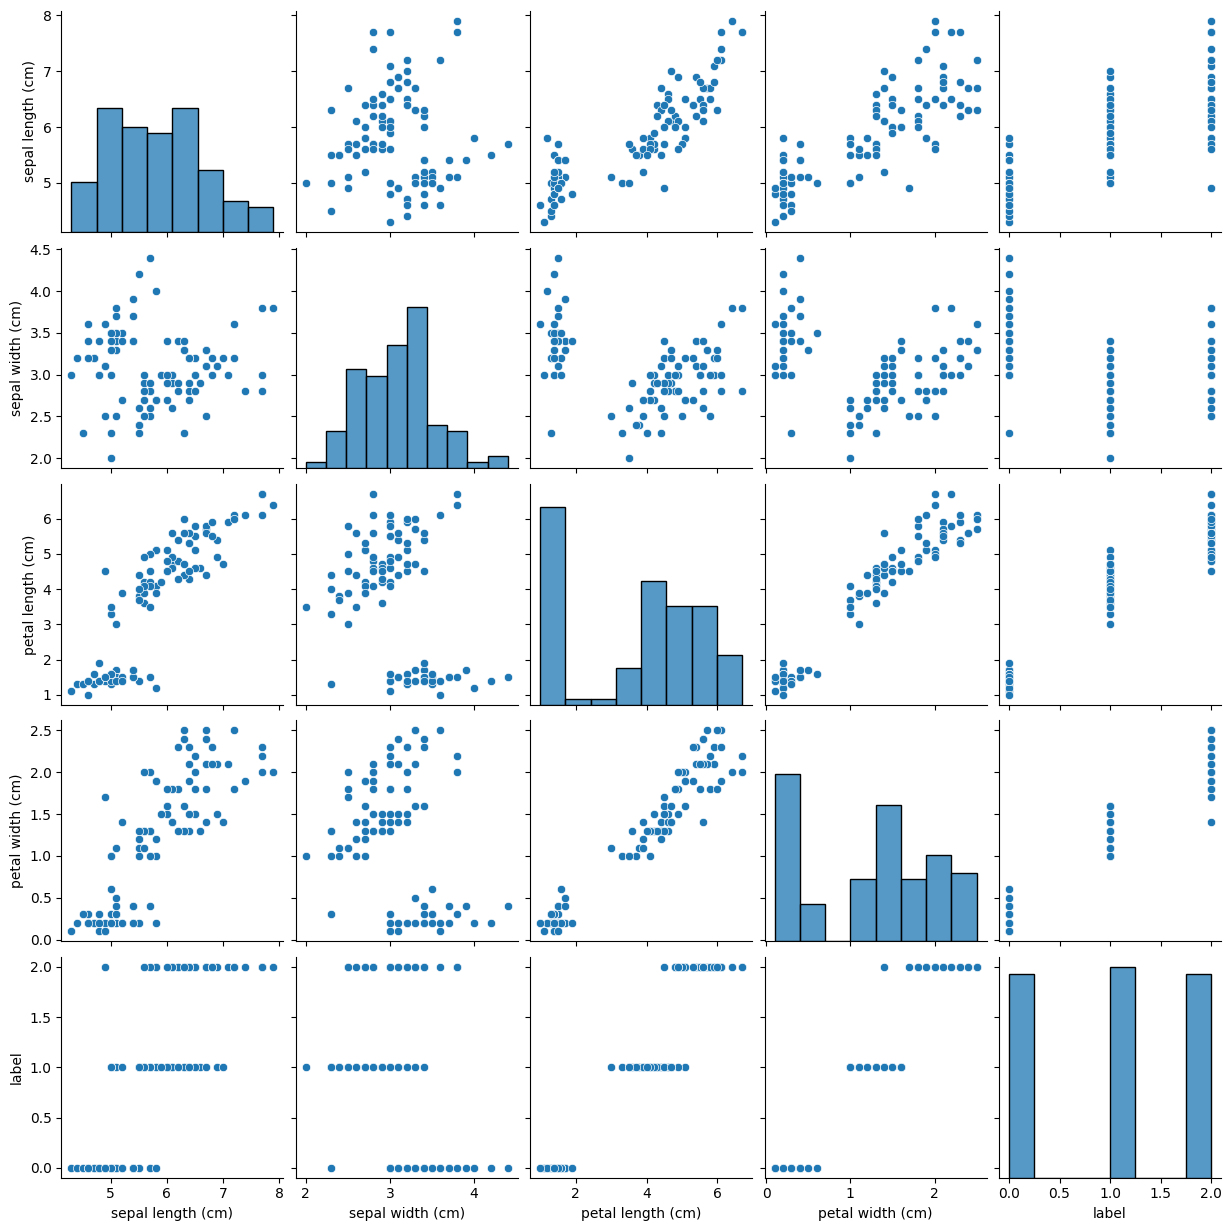

In [26]:
sns.pairplot(data_train)
plt.show()

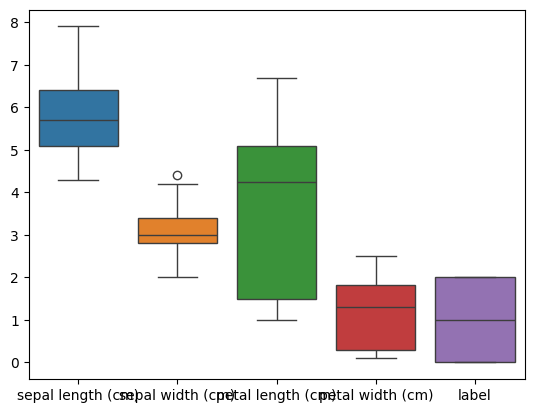

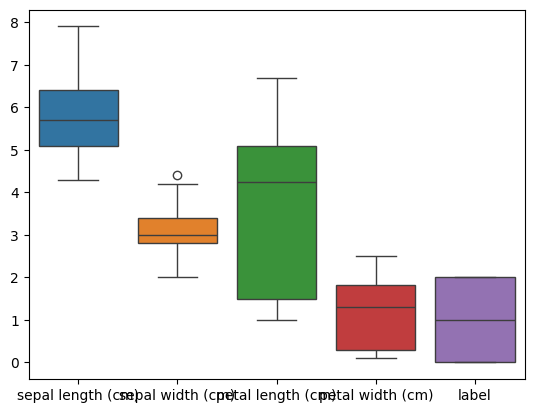

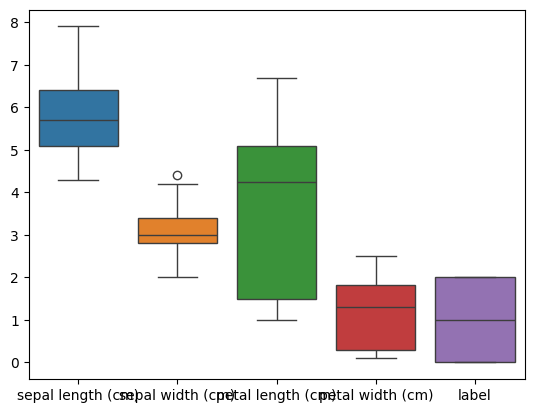

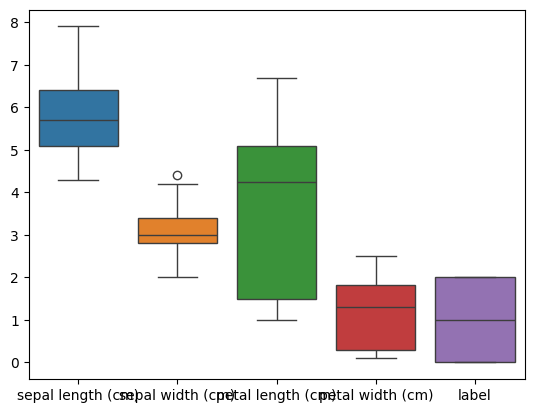

In [27]:
for x in X_train.columns:
    sns.boxplot(data_train)
    plt.show()

# Classification with KNN

## Classification using all the features

The `sklearn` classifier [`KNeighborsClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier) works as a regular Python object! 

In particular it has 

- attributes:
    - `n_neighbors`$=k$
    - [`metric`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html)
    - `weights`
- methods
    - `.fit` to train the model
    - `.predict` to predict tests' label (specie)
    - `.score` to prodive classification score

Create a baseline $k$-NN classifier with $k=3$ and train the model on `X_train` and `y_train`

In [28]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier(n_neighbors=3)

knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

### Classification errors

Compute the classification error on the training set `X_train` in 2 ways:

- use `predict` method
- use `score` method

In [29]:
from sklearn.metrics import accuracy_score

# Faire des prédictions sur l'ensemble d'apprentissage
y_pred = knn_classifier.predict(X_train)

# Calculer l'erreur de classification en comparant les prédictions avec les vrais labels
classification_error_predict = 1 - accuracy_score(y_train, y_pred)

print("Erreur de classification (méthode predict) :", classification_error_predict)


Erreur de classification (méthode predict) : 0.020000000000000018


In [30]:
#  méthode score pour calculer l'erreur de classification
classification_error_score = 1 - knn_classifier.score(X_train, y_train)

print("Erreur de classification (méthode score) :", classification_error_score)


Erreur de classification (méthode score) : 0.020000000000000018


Now evaluate your model on the test set and give the corresponding classification error, `err_test`

In [31]:
from sklearn.metrics import accuracy_score

# Faire des prédictions sur l'ensemble de test
y_pred_test = knn_classifier.predict(X_test)

# Calculer l'erreur de classification sur l'ensemble de test
err_test = 1 - accuracy_score(y_test, y_pred_test)

print("Erreur de classification sur l'ensemble de test :", err_test)


Erreur de classification sur l'ensemble de test : 0.020000000000000018


Use the function `confusion_matrix` to compute the confusion matrix called `conf_mat`of the classifier on the test set.

In [40]:
from sklearn.metrics import confusion_matrix


conf_mat = confusion_matrix(y_test, y_pred_test)

print("Matrice de confusion :")
print(conf_mat)

Matrice de confusion :
[[17  0  0]
 [ 0 15  1]
 [ 0  0 17]]


To display a nice confusion matrix you can use the following

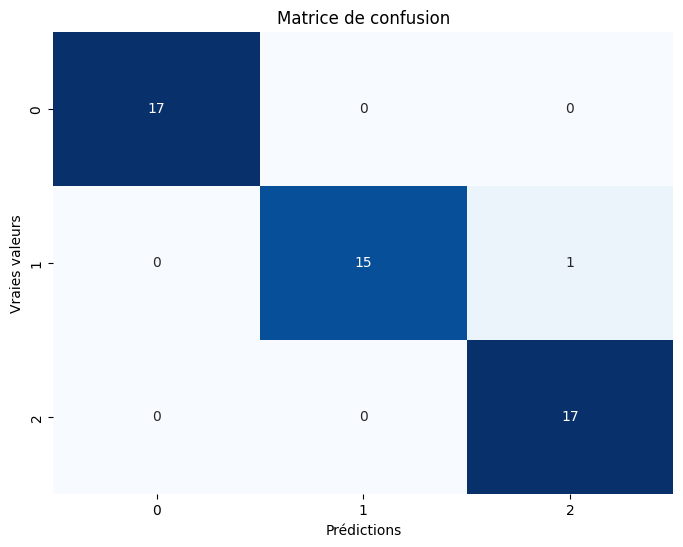

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Créer une heatmap de la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False)

# Ajouter des étiquettes et des titres
plt.xlabel('Prédictions')
plt.ylabel('Vraies valeurs')
plt.title('Matrice de confusion')

# Afficher le graphique
plt.show()


Any comment?

Pretty nice, isn't it?
We make 100% of accurate prediction on the first category. This is expected as the data of the first category well clearly well separated from the others in our pair plots. The predictions on the other classes are also quite good.

## Classification using only 2 features

From the visualization part what could be the best 2 discriminative features?

Create `X_train_2D` the corresponding 2D training set.

Train a baseline $k$-NN classifier based only on these 2 features, with $k=3$

0.98
0.96


### Decision boundary

To do this, you can mesh the input space and predict the class of each point of the mesh

To construct the mesh you can use

Predict labels of the mesh's nodes

To display the decision boundary you can use `contourf` in the following way

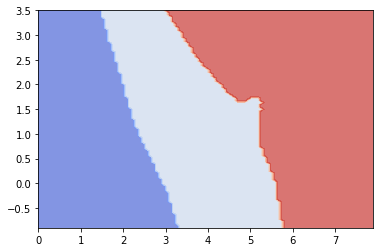

Now **you** can display both the decision boundary and train/test examples

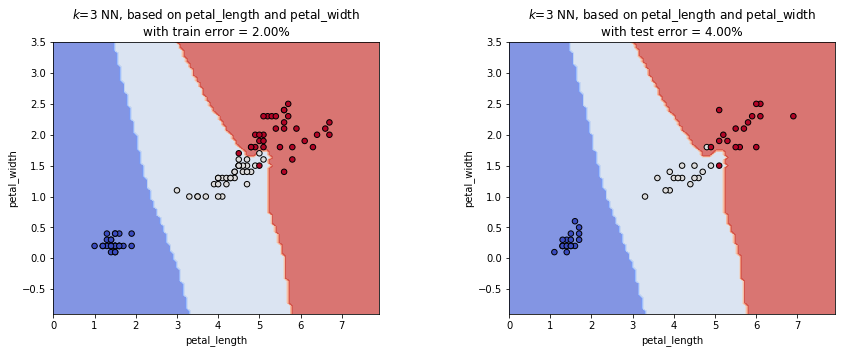

In [75]:
n_neigh = 3
# Plot
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

title_main = r'$k$={} NN, based on {}'.format(n_neigh, ' and '.join(features))

data_types = ['train', 'test']
datas = [(X_train, y_train), (X_test, y_test)]

for dat, dat_typ, ax in zip(datas, data_types, axes.ravel()):
    
    X, y = dat
    err_sc = 100*(1.0-model2.score(X[features], y))
    tit_sub = 'with {} error = {:.2f}%'.format(dat_typ, err_sc)
    
    ax.set_title('\n'.join([title_main, tit_sub]))
    # Decision boundary
    ax.contourf(xx, yy, y_pred_mesh.reshape(xx.shape),
                cmap=plt.cm.coolwarm, alpha=0.7)

    # Plot also the training/test points
    ax.scatter(X[features[0]], X[features[1]], c=y, 
               cmap=plt.cm.coolwarm, edgecolor='k', s=30)

    ax.set_xlabel(features[0]); ax.set_xlim(xx.min(), xx.max())
    ax.set_ylabel(features[1]); ax.set_ylim(yy.min(), yy.max())

plt.show()

### Tune the $k$ parameter

#### Manually

Split the 2D training set into a smaller dataset and one validation set.

The latter is used as an indicator of the predicting power of $k$-NN classifier on the test set for different values of $k$.

In other words

- `X_train_2D, y_train` $\mapsto$ `X_train_small` $\cup$ `X_valid`, `y_valid` $\cup$ `y_train_small`
- Fit the model for different values of $k$ and predict on the validation set
- Pick the value of $k$ that yields the smallest validation error

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

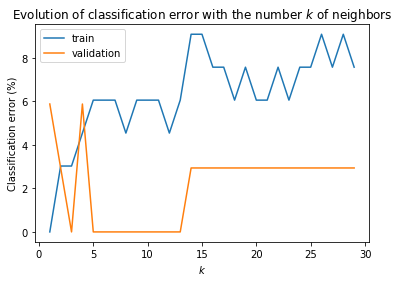

Test error 4.0000000000000036


#### Bonus: with `sklearn` [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

In [87]:
from sklearn.model_selection import GridSearchCV

In [88]:
nb_folds = 5
grid = {'n_neighbors': np.arange(1, 20),
        'weights': ['uniform', 'distance']}
knn_gs = GridSearchCV(estimator=KNN(metric='euclidean'),
                           param_grid=grid,
                           cv=nb_folds,
                           return_train_score=True,
                           scoring='accuracy')

# features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
features = ['petal_length', 'sepal_width']

# train the classifier with the best values found by cross validation
knn_gs.fit(X_train[features], y_train)

/home/dbaudry/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='euclidean',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=0)

In [89]:
print(knn_gs.best_params_)

{'n_neighbors': 16, 'weights': 'uniform'}


In [90]:
knn_best = knn_gs.best_estimator_
knn_best.fit(X_train[features], y_train)
print("the test error is", 1-knn_best.score(X_test[features], y_test))

the test error is 0.020000000000000018


Inside the `knn_gs` object, one can retrieve all kind of informations about how the cross-validation went. Especially, one can use that information to plot the validation error as a function of the parameter k.

[{'n_neighbors': 1, 'weights': 'uniform'}, {'n_neighbors': 1, 'weights': 'distance'}, {'n_neighbors': 2, 'weights': 'uniform'}, {'n_neighbors': 2, 'weights': 'distance'}, {'n_neighbors': 3, 'weights': 'uniform'}, {'n_neighbors': 3, 'weights': 'distance'}, {'n_neighbors': 4, 'weights': 'uniform'}, {'n_neighbors': 4, 'weights': 'distance'}, {'n_neighbors': 5, 'weights': 'uniform'}, {'n_neighbors': 5, 'weights': 'distance'}, {'n_neighbors': 6, 'weights': 'uniform'}, {'n_neighbors': 6, 'weights': 'distance'}, {'n_neighbors': 7, 'weights': 'uniform'}, {'n_neighbors': 7, 'weights': 'distance'}, {'n_neighbors': 8, 'weights': 'uniform'}, {'n_neighbors': 8, 'weights': 'distance'}, {'n_neighbors': 9, 'weights': 'uniform'}, {'n_neighbors': 9, 'weights': 'distance'}, {'n_neighbors': 10, 'weights': 'uniform'}, {'n_neighbors': 10, 'weights': 'distance'}, {'n_neighbors': 11, 'weights': 'uniform'}, {'n_neighbors': 11, 'weights': 'distance'}, {'n_neighbors': 12, 'weights': 'uniform'}, {'n_neighbors': 1

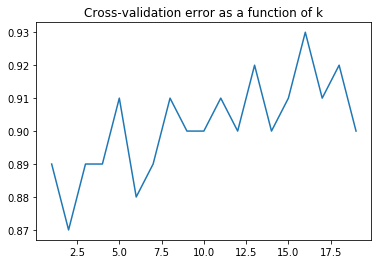

In [91]:
# all the combinations of the parameter tried 
params_gs = knn_gs.cv_results_['params']
print(params_gs)

# retrieve the cross-validation error for all the parameters 
test_gs = knn_gs.cv_results_['mean_test_score']
print(test_gs)

# for the choice of "uniform", first retrieve the corresponding indices
ind_unif = [i for i, par in enumerate(params_gs) if par['weights']=='uniform']

k_range = grid['n_neighbors']

plt.title('Cross-validation error as a function of k')
plt.plot(k_range, test_gs[ind_unif])
plt.show()